<a href="https://colab.research.google.com/github/HarshJain41/Global-Terrorism-Data-Analysis/blob/main/Harsh_Jain_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

## Importing The Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading The Dataset and checking its shape

In [3]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter Canberra/Module 1 - Python For Data Science/Capstone Project 1 - EDA on Global Terrorism/Copy of Global Terrorism Data.csv', encoding = 'latin1', low_memory = False)
# encoding  = 'latin1' is because of big dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
df.shape

(181691, 135)

In [7]:
# Here we have 135 columns, let's see what are they
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [8]:
df.isnull().sum().values  ###The values in the array are the count of null values that each column have.

array([     0,      0,      0,      0, 172452,      0, 179471,      0,
            0,      0,      0,    421,    434,   4556,   4557,      6,
            0, 126196,  66129,      0,      0,      0,      1, 152680,
       152680,      1,      0,      0,      0,      0, 175377, 175377,
       181263, 181263,      0,      0,  10373,  10373,  42550,    636,
         1559,   1559, 170547, 170547, 171006, 171006, 171574, 170671,
       170863, 170863, 180515, 180515, 180594, 180594, 180665, 180516,
       180544, 180544,      0, 175801, 179678, 181531, 181367, 181671,
       131130,    380, 179736, 181371,      0,  71115,  69489,  66120,
       162608, 162608, 179801, 181075, 181075, 181373, 181558, 181558,
       176852,      0,      0,  20768,  20768, 168564, 168564, 170149,
       170149, 179828, 179828, 179998, 179998, 181618, 181618, 181621,
       181621,  67670,  10313,  64446,  66958,  16311,  64702,  69143,
            0, 117626, 117626, 142702, 123732,    178, 168119, 168174,
      

### It looks like many of these columns are of no use, and have many null values in them. So, In next step we will filter out the most important columns for our data analysis.

## Filtering the Culumns - 
#### Here I've created a new dataframe that contains only those columns that seems important for data analysis.

In [9]:
new_df = df[['eventid', 'iyear', 'imonth', 'iday', 'provstate',
                     'country_txt', 'region_txt',
                     'city', 'latitude', 'longitude', 'location', 'summary', 'success', 'suicide', 'attacktype1_txt',
                      'targtype1_txt', 'gname', 'weaptype1_txt', 'nkill', 'nwound', 'motive']]

In [10]:
#Renaming the Column Names-:

new_df = new_df.rename(columns = {'eventid':'Event ID', 'iyear':'Year Of Attack', 'imonth':'Month Of Attack', 
                                   'iday': 'Day Of Attack', 'country_txt':'Country', 'region_txt':'Region', 'provstate':'State',          
                                   'city': 'City', 'latitude':'Latitude', 'longitude':'Longitude', 
                                   'location':'Location', 'summary':'Summary', 'success':'Success', 'suicide':'Suicide',
                                   'attacktype1_txt':'Attack Type', 'targtype1_txt':'Target_Type', 
                                   'gname':'Group Name', 'weaptype1_txt':'Weapon_Type', 'nkill':'People_Killed',
                                   'nwound':'Wounded', 'motive':'Motive'})

In [11]:
new_df.head()

,Event ID,Year Of Attack,Month Of Attack,Day Of Attack,State,Country,Region,City,Latitude,Longitude,...,Summary,Success,Suicide,Attack Type,Target_Type,Group Name,Weapon_Type,People_Killed,Wounded,Motive
0,197000000001,1970,7,2,NaN,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,...,NaN,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0,NaN
1,197000000002,1970,0,0,Federal,Mexico,North America,Mexico city,19.371887,-99.086624,...,NaN,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0,NaN
2,197001000001,1970,1,0,Tarlac,Philippines,Southeast Asia,Unknown,15.478598,120.599741,...,NaN,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0,NaN
3,197001000002,1970,1,0,Attica,Greece,Western Europe,Athens,37.997490,23.762728,...,NaN,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN,NaN
4,197001000003,1970,1,0,Fukouka,Japan,East Asia,Fukouka,33.580412,130.396361,...,NaN,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN,NaN


In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Event ID         181691 non-null  int64  
 1   Year Of Attack   181691 non-null  int64  
 2   Month Of Attack  181691 non-null  int64  
 3   Day Of Attack    181691 non-null  int64  
 4   State            181270 non-null  object 
 5   Country          181691 non-null  object 
 6   Region           181691 non-null  object 
 7   City             181257 non-null  object 
 8   Latitude         177135 non-null  float64
 9   Longitude        177134 non-null  float64
 10  Location         55495 non-null   object 
 11  Summary          115562 non-null  object 
 12  Success          181691 non-null  int64  
 13  Suicide          181691 non-null  int64  
 14  Attack Type      181691 non-null  object 
 15  Target_Type      181691 non-null  object 
 16  Group Name       181691 non-null  obje

In [13]:
new_df.isnull().sum()

Event ID                0
Year Of Attack          0
Month Of Attack         0
Day Of Attack           0
State                 421
Country                 0
Region                  0
City                  434
Latitude             4556
Longitude            4557
Location           126196
Summary             66129
Success                 0
Suicide                 0
Attack Type             0
Target_Type             0
Group Name              0
Weapon_Type             0
People_Killed       10313
Wounded             16311
Motive             131130
dtype: int64

In [14]:
# Here, I've added a new column called Casualty to collect statistics on the overall number of persons affected by terrorist attacks for each observation.

new_df["People_Killed"] = new_df["People_Killed"].fillna(0)
new_df["Wounded"] = new_df["Wounded"].fillna(0)
new_df["Casuality"] = new_df["People_Killed"]+new_df["Wounded"]


In [15]:
new_df.head()

,Event ID,Year Of Attack,Month Of Attack,Day Of Attack,State,Country,Region,City,Latitude,Longitude,...,Success,Suicide,Attack Type,Target_Type,Group Name,Weapon_Type,People_Killed,Wounded,Motive,Casuality
0,197000000001,1970,7,2,NaN,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,...,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0,NaN,1.0
1,197000000002,1970,0,0,Federal,Mexico,North America,Mexico city,19.371887,-99.086624,...,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0,NaN,0.0
2,197001000001,1970,1,0,Tarlac,Philippines,Southeast Asia,Unknown,15.478598,120.599741,...,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0,NaN,1.0
3,197001000002,1970,1,0,Attica,Greece,Western Europe,Athens,37.997490,23.762728,...,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,0.0,0.0,NaN,0.0
4,197001000003,1970,1,0,Fukouka,Japan,East Asia,Fukouka,33.580412,130.396361,...,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,0.0,0.0,NaN,0.0


In [16]:
new_df.describe()

,Event ID,Year Of Attack,Month Of Attack,Day Of Attack,Latitude,Longitude,Success,Suicide,People_Killed,Wounded,Casuality
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.889598,0.036507,2.266860,2.883296,5.150156
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.313391,0.187549,11.227057,34.309747,40.555416
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,0.000000,2.000000,2.000000,4.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1.000000,1570.000000,8191.000000,9574.000000


# Observation Till Now:


1.   Maximum number of People killed in an event were - 1570
2.   Maximum number of People wounded in an event were - 8191
3.   Maximum number of casualities in an event were - 9574




## 1. Yearwise Visualisation

In [17]:
attacks = new_df['Year Of Attack'].value_counts(dropna = False).sort_index().reset_index().rename(columns = {'index':'Year', 'Year':'Attacks'}).set_index('Year')

In [18]:
attacks.head()

,Year Of Attack
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


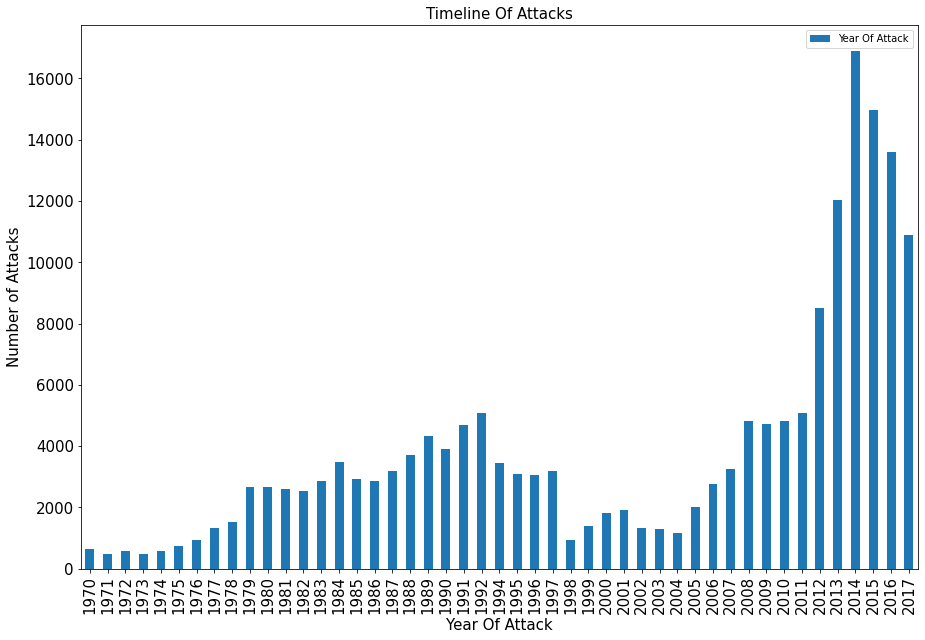

In [24]:
attacks.plot(kind = 'bar', figsize = (15,10), fontsize = 15)
plt.title('Timeline Of Attacks', fontsize = 15)
plt.xlabel('Year Of Attack', fontsize = 15)
plt.ylabel('Number of Attacks', fontsize = 15)
plt.show()

#### Here, from the above visualisation we can see that Maximum Number of Attacks happened in the year of 2014, i.e. 16903. And the minimum Number of Attacks happened in the year of 1971, i.e. 471.